In [1]:
#[PSSE 240 Bus Case system with Renewables](https://www.nrel.gov/grid/test-case-repository.html)

**Originally Contributed by**: José Daniel Lara

# Introduction

This tutorial will introduce the industry models of Renewable Energy the comparisons between
DiffEq Integration techniques for comparison. We show the uses of Sundials and OrdinaryDiffEq
to obtain the transient response of a system to a perturbation.

In [2]:
using PowerSimulationsDynamics
using PowerSystemCaseBuilder
using PowerSystems
using Sundials
using Plots
using OrdinaryDiffEq
PSD = PowerSimulationsDynamics

PowerSimulationsDynamics

## Load the system
The system data is provided through PowerSystemCaseBuilder.

In [3]:
sys = build_system(PSSETestSystems, "psse_240_case_renewable_sys")

┌ Info: Building new system psse_240_case_renewable_sys from raw data
└   sys_descriptor.raw_data = "/home/runner/.julia/packages/PowerSystemCaseBuilder/U2gst/data/PSSE_test"
[ Info: The PSS(R)E parser currently supports buses, loads, shunts, generators, branches, transformers, and dc lines
[ Info: The PSS(R)E parser currently supports buses, loads, shunts, generators, branches, transformers, and dc lines
[ Info: Version 32 of PTI format is unsupported, parser may not function correctly.
[ Info: The following fields in BUS are missing: NVHI, NVLO, EVHI, EVLO
[ Info: The following fields in BUS are missing: NVHI, NVLO, EVHI, EVLO
[ Info: The following fields in BUS are missing: NVHI, NVLO, EVHI, EVLO
[ Info: The following fields in BUS are missing: NVHI, NVLO, EVHI, EVLO
[ Info: The following fields in BUS are missing: NVHI, NVLO, EVHI, EVLO
[ Info: The following fields in BUS are missing: NVHI, NVLO, EVHI, EVLO
[ Info: The following fields in BUS are missing: NVHI, NVLO, EVHI, EVLO
[ I

System
┌───────────────────┬─────────────┐
│ Property          │ Value       │
├───────────────────┼─────────────┤
│ System Units Base │ SYSTEM_BASE │
│ Base Power        │ 100.0       │
│ Base Frequency    │ 60.0        │
│ Num Components    │ 1501        │
└───────────────────┴─────────────┘

Static Components
┌─────────────────┬───────┬────────────────────────┬───────────────┐
│ Type            │ Count │ Has Static Time Series │ Has Forecasts │
├─────────────────┼───────┼────────────────────────┼───────────────┤
│ Arc             │ 351   │ false                  │ false         │
│ Area            │ 4     │ false                  │ false         │
│ Bus             │ 243   │ false                  │ false         │
│ FixedAdmittance │ 7     │ false                  │ false         │
│ Line            │ 329   │ false                  │ false         │
│ LoadZone        │ 14    │ false                  │ false         │
│ PowerLoad       │ 139   │ false                  │ false         │
│ TapTransformer  │ 2     │ false                  │ false         │
│ ThermalStandard │ 146   │ false                  │ false         │
│ Transformer2W   │ 120   │ false                  │ false         │
└─────────────────┴───────┴────────────────────────┴───────────────┘

Dynamic Components
┌───────────────────────────────────────────────────────────────────────────────
│ Type                                                                         ⋯
├───────────────────────────────────────────────────────────────────────────────
│ DynamicGenerator{PowerSystems.RoundRotorQuadratic, PowerSystems.SingleMass,  ⋯
│ DynamicGenerator{PowerSystems.RoundRotorQuadratic, PowerSystems.SingleMass,  ⋯
│ DynamicGenerator{PowerSystems.RoundRotorQuadratic, PowerSystems.SingleMass,  ⋯
│ DynamicGenerator{PowerSystems.RoundRotorQuadratic, PowerSystems.SingleMass,  ⋯
│ DynamicGenerator{PowerSystems.RoundRotorQuadratic, PowerSystems.SingleMass,  ⋯
│ DynamicGenerator{PowerSystems.RoundRotorQuadratic, PowerSystems.SingleMass,  ⋯
│ DynamicInverter{PowerSystems.RenewableEnergyConverterTypeA, PowerSystems.Out ⋯
└───────────────────────────────────────────────────────────────────────────────
                                                               2 columns omitted

## Build the simulation and initialize the problem

The next step is to create the simulation structure. This will create the indexing
of our system that will be used to formulate the differential-algebraic system of
equations. To do so, it is required to specify the perturbation that will occur in
the system. In this case, we will use a ResidualModel formulation, for more details
about the formulation checkout the [Models Section](https://nrel-siip.github.io/PowerSimulationsDynamics.jl/stable/models/)
in `PowerSimulationsDynamics.jl` documentation

In [4]:
using Logging
sim_ida = PSD.Simulation(
    ResidualModel,
    sys, #system
    pwd(),
    (0.0, 20.0), #time span
    BranchTrip(1.0, Line, "CORONADO    -1101-PALOVRDE    -1401-i_10");
    console_level = Logging.Info,
)

[ Info: Unit System changed to InfrastructureSystems.UnitSystemModule.UnitSystem.DEVICE_BASE = 1
[ Info: Validating connectivity with Goderya algorithm
[ Info: The System has no islands
[ Info: Pre-Initializing Simulation States
[ Info: Unit System changed to InfrastructureSystems.UnitSystemModule.UnitSystem.SYSTEM_BASE = 0
[ Info: Validating connectivity with Goderya algorithm
[ Info: The System has no islands
[ Info: PowerFlow solve converged, the results have been stored in the system
[ Info: Unit System changed to InfrastructureSystems.UnitSystemModule.UnitSystem.DEVICE_BASE = 1
┌ Error: Valve limits for TG in generator-2438-ND are bounded (x_g1 = -5.617295671129437e-34). Consider updating their values.
└ @ PowerSimulationsDynamics ~/.julia/packages/PowerSimulationsDynamics/R8NqS/src/initialization/generator_components/init_tg.jl:201
┌ Error: Valve limits for TG in generator-3133-SC are bounded (x_g1 = -1.1234591342258874e-34). Consider updating their values.
└ @ PowerSimulationsDy

Property,Value
Simulation Type,Residual Model
Initialized?,Yes
Multimachine system?,Yes
Time Span,"(0.0, 20.0)"
Number of States,2224
Number of Perturbations,1


## Run the simulation using Sundials
We will now run the simulation using Sundials.jl solver IDA() by specifying the maximum
dt we want for the simulation. In our experience with this solver, solution times are faster
when supplying information about the maximum time step than the tolerances as we can see in the example

In [5]:
PSD.execute!(sim_ida, IDA(), dtmax = 0.01)

SIMULATION_FINALIZED::BUILD_STATUS = 6

## Read the results and plot a system variable
After the simulation is completed, we can extract the results and make plots as desired.
In this case, we will plot the voltage magnitude at the bus at which the line was connected.

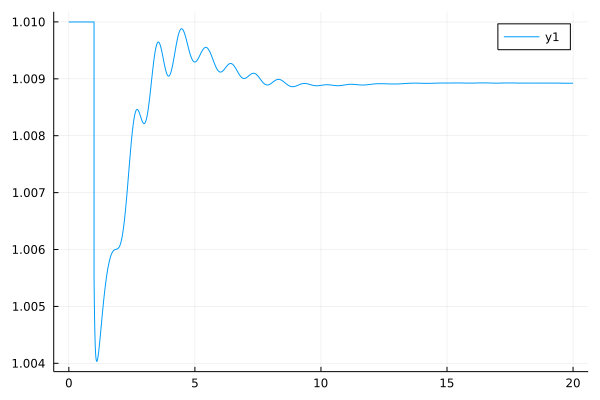

In [6]:
res_ida = read_results(sim_ida)
v1101_ida = get_voltage_magnitude_series(res_ida, 1101);
plot(v1101_ida)

## Run the simulation using Rodas4()
In this case, we will use a MassMatrixModel formulation, for more details
about the formulation checkout the [Models Section](https://nrel-siip.github.io/PowerSimulationsDynamics.jl/stable/models/)
in `PowerSimulationsDynamics.jl` documentation

In [7]:
sim_rodas = PSD.Simulation(
    MassMatrixModel,
    sys, #system
    pwd(),
    (0.0, 20.0), #time span
    BranchTrip(1.0, Line, "CORONADO    -1101-PALOVRDE    -1401-i_10");
    console_level = Logging.Info,
)

[ Info: Unit System changed to InfrastructureSystems.UnitSystemModule.UnitSystem.DEVICE_BASE = 1
[ Info: Validating connectivity with Goderya algorithm
[ Info: The System has no islands
[ Info: Pre-Initializing Simulation States
[ Info: Unit System changed to InfrastructureSystems.UnitSystemModule.UnitSystem.SYSTEM_BASE = 0
[ Info: Validating connectivity with Goderya algorithm
[ Info: The System has no islands
[ Info: PowerFlow solve converged, the results have been stored in the system
[ Info: Unit System changed to InfrastructureSystems.UnitSystemModule.UnitSystem.DEVICE_BASE = 1
┌ Error: Valve limits for TG in generator-2438-ND are bounded (x_g1 = -5.617295671129437e-34). Consider updating their values.
└ @ PowerSimulationsDynamics ~/.julia/packages/PowerSimulationsDynamics/R8NqS/src/initialization/generator_components/init_tg.jl:201
┌ Error: Valve limits for TG in generator-3133-SC are bounded (x_g1 = -1.1234591342258874e-34). Consider updating their values.
└ @ PowerSimulationsDy

Property,Value
Simulation Type,Mass Matrix Model
Initialized?,Yes
Multimachine system?,Yes
Time Span,"(0.0, 20.0)"
Number of States,2224
Number of Perturbations,1


We will now run the simulation using OrdinaryDiffEq.jl solver Rodas4() by specifying the
tolerance we want for the simulation. In our experience with this solver, solution times are faster
when supplying information about the atol and rtol values as we can see in the example. The solver will also
work with a specified dtmax but take a significantly longer time to solve.
When using OrdinaryDiffEq.jl solvers always pass the option `initializealg = NoInit()` to avoid
unnecessary re-initialization of the algebraic equations.

In [8]:
PSD.execute!(
    sim_rodas,
    Rodas4(),
    saveat = 0.01,
    atol = 1e-10,
    rtol = 1e-10,
    initializealg = NoInit(),
)

SIMULATION_FINALIZED::BUILD_STATUS = 6

## Read the results
After the simulation is completed, we can extract the results and make plots as desired.
In this case, we will plot the voltage magnitude at the bus at which the line was connected.

In [9]:
res_rodas = read_results(sim_rodas)

Property,Value
System Base Power [MVA],100.0
System Base Frequency [Hz],60.0
Time Span,"(0.0, 20.0)"
Total Time Steps,2002
Number of States,2224
Total solve time,82.93667121


## Compare the results
After the simulation is completed, we can extract the results and make plots as desired.
In this case, we will plot the voltage magnitude at the bus at which the line was connected.
For both of the solution techniques.

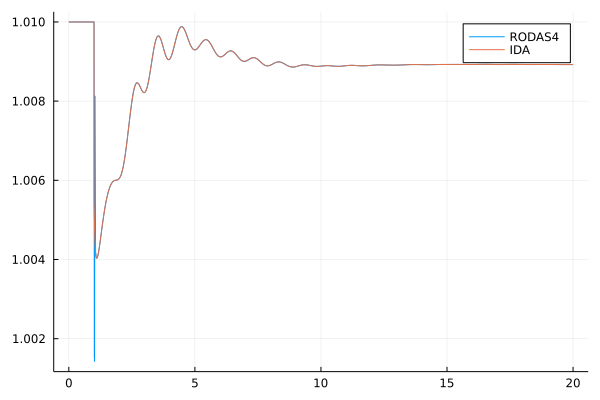

In [10]:
v1101 = get_voltage_magnitude_series(res_rodas, 1101);
plot(v1101, label = "RODAS4")
plot!(v1101_ida, label = "IDA")

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*